### Honey production

You may have seen articles about the decline of the honeybee population for various reasons. We want to investigate this decline and how the trends of the past predict the future for the honeybees.

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [3]:
# Load the data
df = pd.read_csv("honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


The columns in `honeyproduction.csv` data set include:
- **state** - state name abbreviation
- **numcol** - number of honey producing colonies
- **yieldpercol** - yield per colony (lbs)
- **totalprod** - total production (numcol*yieldpercol), (lbs)
- **stocks** - stocks held by producers on Dec 15 (lbs)
- **priceperlb** - average price per pound ($)
- **prodvalue** - value of production (totalprod*prodvalue), ($)
- **year** - year the data pertains to

In [32]:
# Use the .groupby() method provided by pandas to get the mean of totalprod per year
prod_per_year = df.groupby("year").totalprod.mean().reset_index()
pd.set_option("display.float_format", lambda x: "%.2f" % x)
prod_per_year.head()

,year,totalprod
0,1998,5105093.02
1,1999,4706674.42
2,2000,5106000.00
3,2001,4221545.45
4,2002,3892386.36


In [5]:
# Create a variable called X that is the column of year in this prod_per_year dataframe. Reshape it to get it into the right format
X = prod_per_year["year"]
X = X.values.reshape(-1, 1)

In [7]:
# Create a variable called y that is the totalprod column in the prod_per_year
y = prod_per_year["totalprod"]

/var/folders/d6/1gr1j28j24lc4659hzswtl400000gn/T/ipykernel_23017/3171543246.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


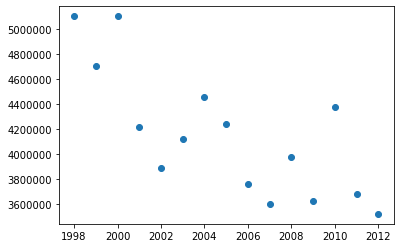

In [36]:
# Using plt.scatter(), plot y vs X as a scatterplot
plt.scatter(X, y)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

We can see a vaguely linear relationship between these variables.

In [9]:
# Create a linear regression model from scikit-learn
regr = linear_model.LinearRegression()

In [11]:
# Fit the model 
regr.fit(X, y)

# Print out the slope and the intercept of the line
print(regr.coef_[0])
print(regr.intercept_)

-88303.18915238195
181208083.10732982


/var/folders/d6/1gr1j28j24lc4659hzswtl400000gn/T/ipykernel_23017/1952481983.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


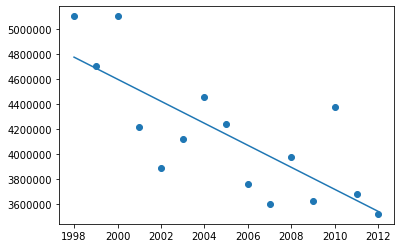

In [37]:
# Create a list called y_predict that is the predictions our model would make on the X data and plot y_predict vs X as a line
y_predict = regr.predict(X)
plt.scatter(X, y)
plt.plot(X, y_predict)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()


It looks like the production of honey has been in decline, according to this linear model. Let's predict what the year 2050 may look like in terms of honey production.

In [18]:
# Create a NumPy array called X_future that is the range from 2013 to 2050. Reshape it to get it into the right format
X_future = np.array(range(2013,2050))
print(X_future)
X_future = X_future.reshape(-1, 1)
print(X_future)

[2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026
 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040
 2041 2042 2043 2044 2045 2046 2047 2048 2049]
[[2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]
 [2026]
 [2027]
 [2028]
 [2029]
 [2030]
 [2031]
 [2032]
 [2033]
 [2034]
 [2035]
 [2036]
 [2037]
 [2038]
 [2039]
 [2040]
 [2041]
 [2042]
 [2043]
 [2044]
 [2045]
 [2046]
 [2047]
 [2048]
 [2049]]


In [19]:
# Create a list called future_predict that is the y-values that our model would predict for the values of X_future
future_predict = regr.predict(X_future)

/var/folders/d6/1gr1j28j24lc4659hzswtl400000gn/T/ipykernel_23017/4251276230.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


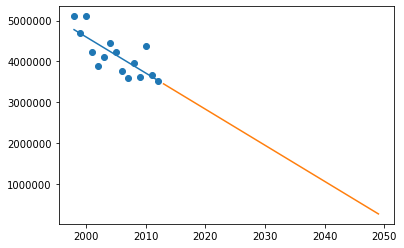

In [38]:
# Plot future_predict vs X_future
plt.scatter(X, y)
plt.plot(X, y_predict)
plt.plot(X_future, future_predict)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

According to the plot there will be less than 1000000 lbs of honey produced by 2050.